In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
df_trans=pd.read_csv("../data/Trans2.csv")
df_trans.info()
df_trans["Date"]=pd.to_datetime(df_trans["Date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886825 entries, 0 to 886824
Data columns (total 5 columns):
Entity         886825 non-null object
Account        886825 non-null int64
Date           886825 non-null object
Description    878195 non-null object
Amount         886825 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [3]:
df_trans["month"]=df_trans["Date"].dt.month
df_trans["year"]=df_trans["Date"].dt.year
df_trans["day"]=df_trans["Date"].dt.day

In [4]:
df_trans.head()

,Entity,Account,Date,Description,Amount,month,year,day
0,100-100001,41101,2012-07-01,Record PY prpd txs as CY,-116018.63,7,2012,1
1,100-100001,41103,2012-07-01,Record PY prpd txs as CY,-1343129.12,7,2012,1
2,100-100001,41201,2012-07-01,accrue sales&use tax 7/16,1901125.37,7,2012,1
3,100-100001,41202,2012-07-01,accrue sales&use tax 7/16,866051.86,7,2012,1
4,100-100001,41203,2012-07-01,accrue sales&use tax 7/16,575521.51,7,2012,1


In [5]:
df_trans=df_trans[df_trans["year"]>2012]

In [6]:
df_trans.head()

,Entity,Account,Date,Description,Amount,month,year,day
80317,100-101110,53040,2013-01-01,107683AT&T INC,194.16,1,2013,1
80318,100-101110,53070,2013-01-01,18690CAROLINA PEACEMA,243.75,1,2013,1
80319,100-102110,53040,2013-01-01,107683AT&T INC,48.54,1,2013,1
80320,100-105002,52010,2013-01-01,83881SHI INTERNATION,507.35,1,2013,1
80321,100-105002,52050,2013-01-01,93130WALLSTREET DELI,681.45,1,2013,1


In [7]:
len(df_trans[df_trans.Amount>0])

535976

In [8]:
len(df_trans)

806508

In [12]:
amt=df_trans[df_trans.Amount>0].groupby(by=["year","month"])["Amount"].sum()

In [13]:
amt.values

array([5.18090250e+07, 8.34817448e+07, 6.37374249e+07, 6.36765429e+07,
       5.63531762e+07, 9.32549930e+07, 6.28899454e+07, 9.18232886e+07,
       6.84840544e+07, 1.04294889e+08, 6.39049819e+07, 5.61491857e+07,
       7.43527281e+07, 7.57304474e+07, 6.50740138e+07, 7.41986007e+07,
       5.67191422e+07, 8.93483874e+07, 4.96809718e+07, 8.23119177e+07,
       8.43731938e+07, 7.81028282e+07, 6.33617584e+07, 5.68980017e+07,
       5.39880665e+07, 7.29692484e+07, 6.56141912e+07, 5.94457784e+07,
       6.12593448e+07, 8.69606030e+07, 5.66437810e+07, 9.28729678e+07,
       8.28278840e+07, 9.67781721e+07, 5.07085377e+07, 5.17114241e+07,
       5.57855034e+07, 7.28125041e+07, 7.06735979e+07, 1.84837876e+08,
       5.40894497e+07, 8.24635359e+07, 6.38994377e+07, 9.01390272e+07,
       9.93579865e+07, 8.06707467e+07, 6.49791190e+07, 6.61466707e+07,
       6.05801787e+07, 8.11209829e+07, 8.28640385e+07, 9.90858294e+07,
       5.98732147e+07, 9.86546822e+07])

[Text(0,0.5,'Probability'), Text(0.5,0,'Amount spend')]

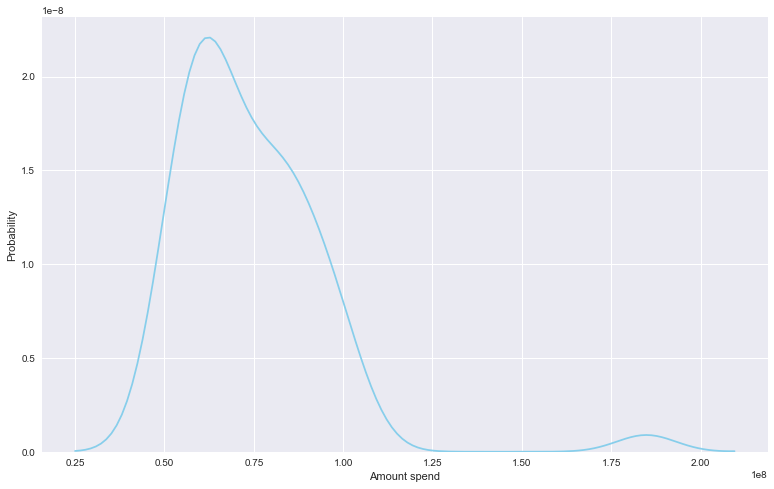

In [24]:
import seaborn as sns
sns.set(color_codes=True)
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(13,8)})
ax = sns.distplot(amt.values,
                  kde=True,
                  hist=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Amount spend', ylabel='Probability')

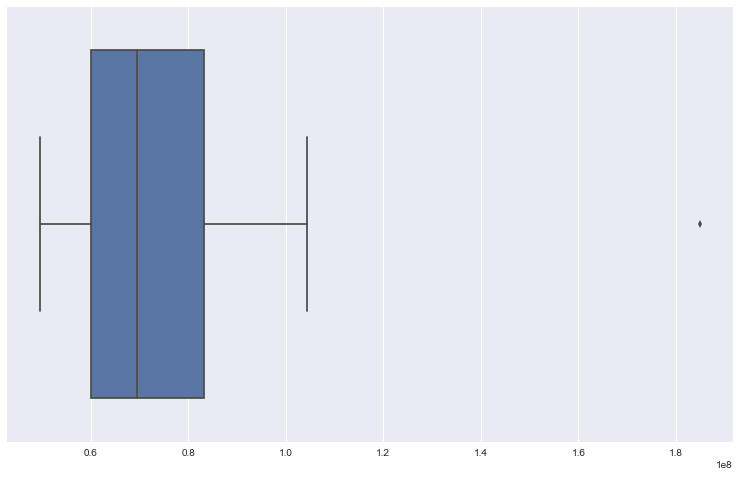

In [19]:
import seaborn as sns
sns.boxplot(x=amt.values)

In [25]:
 amt_day=df_trans[df_trans.Amount>0].groupby(by=["year","month","day"])["Amount"].sum()

[Text(0,0.5,'Probability'), Text(0.5,0,'Amount spend')]

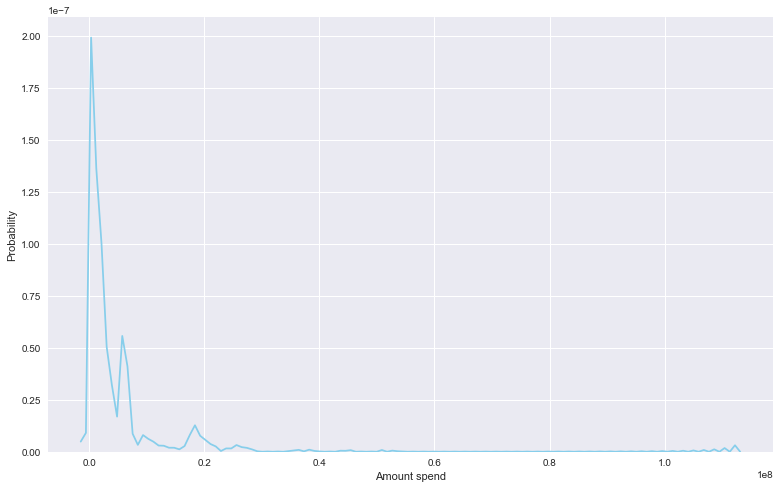

In [26]:
ax = sns.distplot(amt_day.values,
                  kde=True,
                  hist=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Amount spend', ylabel='Probability')

In [27]:
Q1 = amt.quantile(0.25)
Q3 = amt.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23277362.579999596


In [28]:
m=amt.mean()

In [30]:
sd=amt.std()

In [32]:
amt_1=[x for x in amt if x> ((Q1 - 1.5 * IQR)) ]

In [36]:
amt_2=[x for x in amt if x< ((Q3 + 1.5 * IQR)) ]

[Text(0,0.5,'Probability'), Text(0.5,0,'Amount spend')]

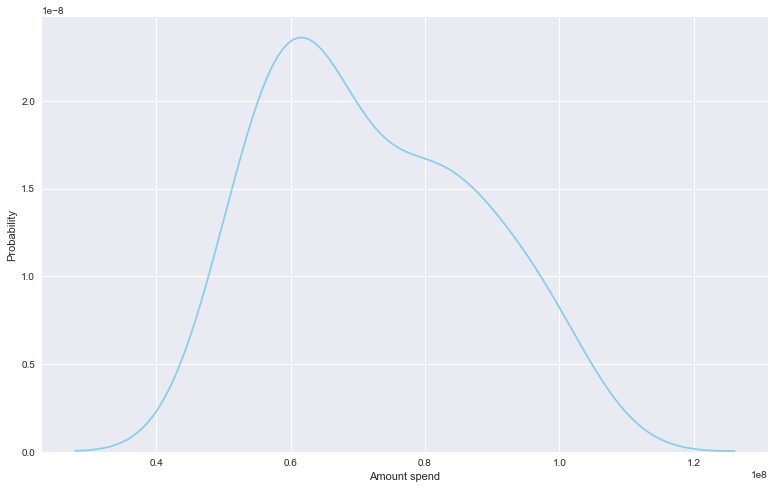

In [37]:
ax = sns.distplot(amt_2,
                  kde=True,
                  hist=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Amount spend', ylabel='Probability')